In [252]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [253]:
import numpy as np
import regression
from sklearn.preprocessing import StandardScaler

In [254]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [269]:
# Load data
X_train, X_val, y_train, y_val = regression.utils.loadDataset(
    features=[
        'Penicillin V Potassium 500 MG',
        'Computed tomography of chest and abdomen',
        'Plain chest X-ray (procedure)',
        'Low Density Lipoprotein Cholesterol',
        'Creatinine',
        'AGE_DIAGNOSIS'
    ],
    split_percent=0.8,
    split_seed=42
)

# Scale the data, since values vary across feature. Note that we
# fit on the training data and use the same scaler for X_val.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)


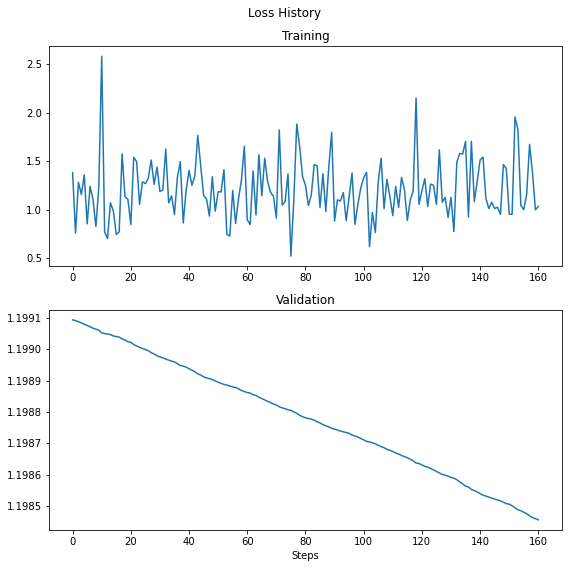

In [270]:
# For testing purposes, once you've added your code.
# CAUTION: hyperparameters have not been optimized.
log_model = regression.logreg.LogisticRegressor(num_feats=6, learning_rate=0.00001, tol=0.01, max_iter=10, batch_size=10)

log_model.train_model(X_train, y_train, X_val, y_val)
log_model.plot_loss_history()

In [268]:
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
y_preds = log_model.make_prediction(X_val)

ValueError: shapes (400,8) and (7,) not aligned: 8 (dim 1) != 7 (dim 0)

In [258]:
mse = np.mean((y_preds-y_val)**2)
print(mse)

0.2963700954434353


In [259]:
np.min(y_preds)

0.009602484145142977

In [260]:
test_loss = log_model.loss_function(y_val, log_model.make_prediction(X_val))
print(test_loss)

2.0294702759677214


In [261]:
sklearn_loss = log_loss(y_val, log_model.make_prediction(X_val))
print(sklearn_loss)

2.0294702759677214


In [262]:
np.allclose(test_loss, sklearn_loss)

True

In [263]:
log_model.loss_hist_train[0] > log_model.loss_hist_train[-1]

True

In [264]:
loss_vals = log_model.loss_hist_train

In [266]:
loss_vals[0] > loss_vals[-1]

True

In [271]:
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])

In [280]:
gradient = log_model.calculate_gradient(y_train, X_train)
gradient

array([-0.32864149, -0.47478514, -0.21296648, -0.        , -0.        ,
        0.06186216,  0.00862456])

In [281]:
np.allclose(gradient, np.array([-0.32864149, -0.47478514, -0.21296648, -0. ,-0., 0.06186216, 0.00862456]))

True